In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.io import wavfile
import os
import sys
sys.path.append("../")
import mymodule2 as mm
from exp_guitare_configs import *

%matplotlib widget

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (12,4)

# Expérience sur guitare+corde

In [3]:
path_to_folder = "../../../Mesures/Mesures_2023.01.20_Test/"


guit_exp_pos1 = {
    "x_acc" : 26e-2, #position selon x de l'accéléromètre (m)
    "y_acc" : 10e-2, #position selon y de l'accéléromètre (m)
    "xc_doigt" : 10.4e-2, #position du doigt sur la corde dans le cas où on appuie. On considère l'appuie sur la frette. (m)
}

guit_exp_pos2 = {
    "x_acc" : 8e-2, #position selon x de l'accéléromètre (m)
    "y_acc" : 8e-2, #position selon y de l'accéléromètre (m)
}

guit_exp = {
    "corde_config" : corde_acier,
    "table_config" : table_composite,
    "fs" : 0, #fréquence d'échantillonnage (Hz)
    "Pos 1" : guit_exp_pos1,
    "Pos 2" : guit_exp_pos2,
    "sensi_accel" : 99.3*9.81, #mV/(m/s2)
}

In [4]:
mat = loadmat(path_to_folder+"Guitare_Da_Prova_Pos_1.mat")
print(mat.keys())

fs = int(mat["fs"].reshape(-1))
guit_exp["fs"] = fs

guit_exp_pos1["acc_t"] = (mat["acc_t"]/guit_exp["sensi_accel"]).reshape(-1)
guit_exp_pos1["time"], guit_exp_pos1["acc_t"] = mm.remove_init_noise(guit_exp_pos1["acc_t"], fs, ratio_parameter=3)
# guit_exp_pos1["time"] = mat["time"].reshape(-1)

mat = loadmat(path_to_folder+"Guitare_Da_Prova_Pos_1_Doigt.mat")
guit_exp_pos1["acc_doigt_t"] = mat["acc_t"].reshape(-1)
guit_exp_pos1["time_doigt"], guit_exp_pos1["acc_doigt_t"] = mm.remove_init_noise(guit_exp_pos1["acc_doigt_t"], fs, ratio_parameter=3)

mat = loadmat(path_to_folder+"Guitare_Da_Prova_Pos_2.mat")
guit_exp_pos2["acc_t"] = (mat["acc_t"]/guit_exp["sensi_accel"]).reshape(-1)
guit_exp_pos2["time"], guit_exp_pos2["acc_t"] = mm.remove_init_noise(guit_exp_pos2["acc_t"], fs, ratio_parameter=3)
# guit_exp_pos2["time"] = mat["time"].reshape(-1)

dict_keys(['__header__', '__version__', '__globals__', 'FRF', 'acc_t', 'fen_acc', 'fen_mar', 'freq', 'fs', 'mar_t', 'signal_accelero_fen', 'signal_marteau_fen', 'time'])


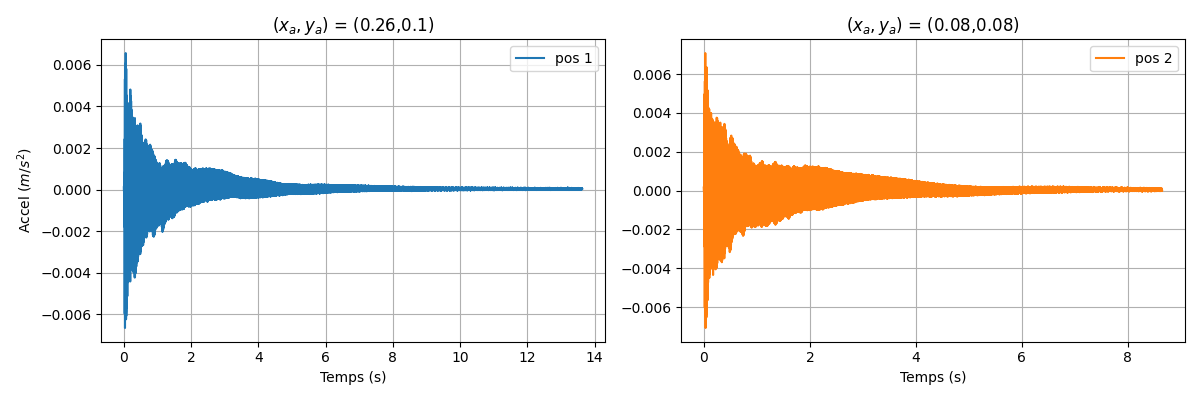

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(guit_exp_pos1["time"],guit_exp_pos1["acc_t"],label="pos 1")
ax1.grid()
ax1.set_title(fr"$(x_a,y_a)$ = ({guit_exp_pos1['x_acc']},{guit_exp_pos1['y_acc']})")
ax1.set_ylabel("Accel $(m/s^2)$")
ax1.set_xlabel("Temps (s)")
ax1.legend()
ax1.set_xlim()
ax1.set_ylim()


ax2.plot(guit_exp_pos2["time"],guit_exp_pos2["acc_t"],label="pos 2", color="tab:orange")
ax2.grid()
ax2.set_xlabel("Temps (s)")
ax2.set_title(fr"$(x_a,y_a)$ = ({guit_exp_pos2['x_acc']},{guit_exp_pos2['y_acc']})")
ax2.legend()
ax2.set_xlim()
ax2.set_ylim()

fig.tight_layout()

plt.show()

Fréquence du dernier mode de corde calculé : 11636 Hz
Fréquence du dernier mode de plaque calculé : 655 Hz


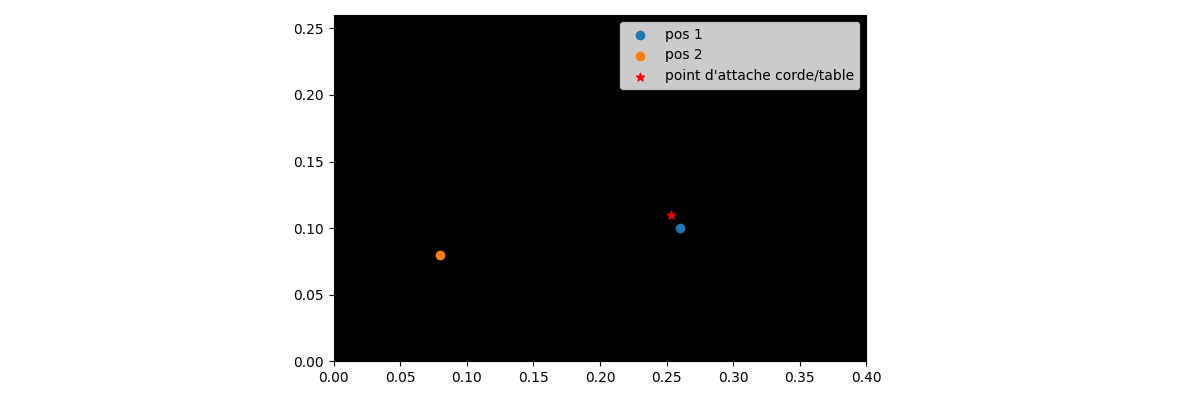

In [6]:
from vico_modphy.guitare_config import *
fig = plt.figure()
ax1 = fig.add_subplot(111)

img = ax1.imshow(np.zeros((Ny,Nx)),
    extent=[x[0], x[-1] , y[0], y[-1]] ,
    cmap="gray" ,
    interpolation = "bilinear",
    # aspect="auto" ,
    origin="lower")

ax1.scatter(guit_exp_pos1["x_acc"], guit_exp_pos1["y_acc"], label="pos 1")
ax1.scatter(guit_exp_pos2["x_acc"], guit_exp_pos2["y_acc"], label="pos 2")
ax1.scatter(CB_ratio_x*Lx, CB_ratio_y*Ly, label="point d'attache corde/table", color="r", marker="*")


# fig.colorbar(img,ax=ax1)
ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel(r"")
ax1.set_title(r"")

#bonus
#cmap = cm.get_cmap('viridis', 20)    # 11 discrete colors
#ax1.set_xscale("log")

fig.tight_layout()

plt.show()

In [7]:
from IPython.display import display, Audio
print("Position 1 - à vide")
display(Audio(guit_exp_pos1["acc_t"],rate=fs))
print("Position 1 - doigt stoppant")
display(Audio(guit_exp_pos1["acc_doigt_t"],rate=fs))
print("Position 2")
display(Audio(guit_exp_pos2["acc_t"],rate=fs))

Position 1 - à vide


Position 1 - doigt stoppant


Position 2


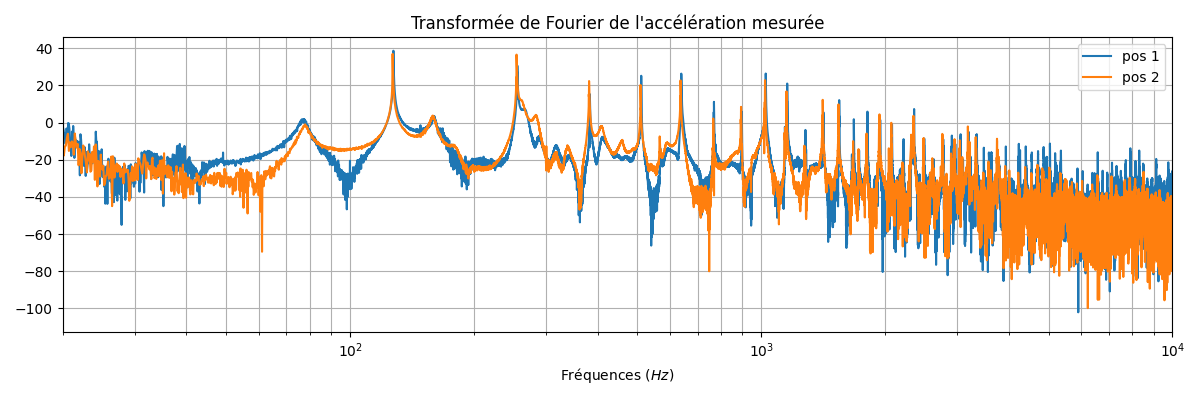

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

Y1 = np.fft.rfft(guit_exp_pos1["acc_t"])
fy1 = np.fft.rfftfreq(len(guit_exp_pos1["acc_t"]),1/fs)

Y2 = np.fft.rfft(guit_exp_pos2["acc_t"])
fy2 = np.fft.rfftfreq(len(guit_exp_pos2["acc_t"]),1/fs)

ax1.semilogx(fy1, 20*np.log10(np.abs(Y1)),label="pos 1")
ax1.semilogx(fy2, 20*np.log10(np.abs(Y2)),label="pos 2")
ax1.grid(which="both")
ax1.legend()
ax1.set_xlabel("Fréquences $(Hz)$")
ax1.set_ylabel("")
ax1.set_title(r"Transformée de Fourier de l'accélération mesurée")
ax1.set_xlim(20, 10000)
ax1.set_ylim()

fig.tight_layout()

# plt.show()

# Comparaison modèle/expérience

In [9]:
def compute_features(data, sr, S=None, n_fft=2048, frame_length=2048, hop_length=512, win_length=None, window='hann',
                     center=True, pad_mode='constant', freq=None, fmin=200.0, n_bands=6, quantile=0.02, linear=False, centroid=None, norm=True,
                     p=2, amin=1e-10, power=2.0,roll_percent=0.85):
    import librosa    
    
    cent = librosa.feature.spectral_centroid(y=data, sr=sr, S=S, n_fft=n_fft, hop_length=hop_length, freq = freq,
                                             win_length=win_length, window=window, center=center, pad_mode=pad_mode)
    spec_bw = librosa.feature.spectral_bandwidth(y=data, sr=sr, S=S, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window, 
                                                 center=center, pad_mode=pad_mode, freq=freq, centroid=centroid, norm=norm, p=p)
    contrast = librosa.feature.spectral_contrast(y=data, sr=sr, S=S, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window, center=center,
                                                 pad_mode=pad_mode, freq=freq, fmin=fmin, n_bands=n_bands, quantile=quantile, linear=linear)
    
    flatness = librosa.feature.spectral_flatness(y=data, S=S, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window, center=center,
                                                 pad_mode=pad_mode, amin=amin, power=power)
    
    rolloff = librosa.feature.spectral_rolloff(y=data, sr=sr, S=S, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window, 
                                                center=center, pad_mode=pad_mode, freq=freq, roll_percent=roll_percent)
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length, center=center)
    
    rms = librosa.feature.rms(y=data, S=S, frame_length=frame_length, hop_length=hop_length, center=center, pad_mode=pad_mode)
    
    # slope = spectral_slope(data, sr, n_fft=n_fft, hop_length=hop_length, win_length=win_length, 
    #                window=window, center=center, pad_mode=pad_mode)
    
    dict_features = {}
    dict_features['spectral_centroid'] = cent
    dict_features['spectral_bandwidth'] = spec_bw
    dict_features['spectral_contrast'] = contrast
    dict_features['spectral_flatness'] = flatness
    dict_features['spectral_rolloff'] = rolloff
    dict_features['zero_crossing_rate'] = zcr
    dict_features['rms'] = rms
    # dict_features['spectral_slope'] = slope
    
    return dict_features

dict_keys(['spectral_centroid', 'spectral_bandwidth', 'spectral_contrast', 'spectral_flatness', 'spectral_rolloff', 'zero_crossing_rate', 'rms'])


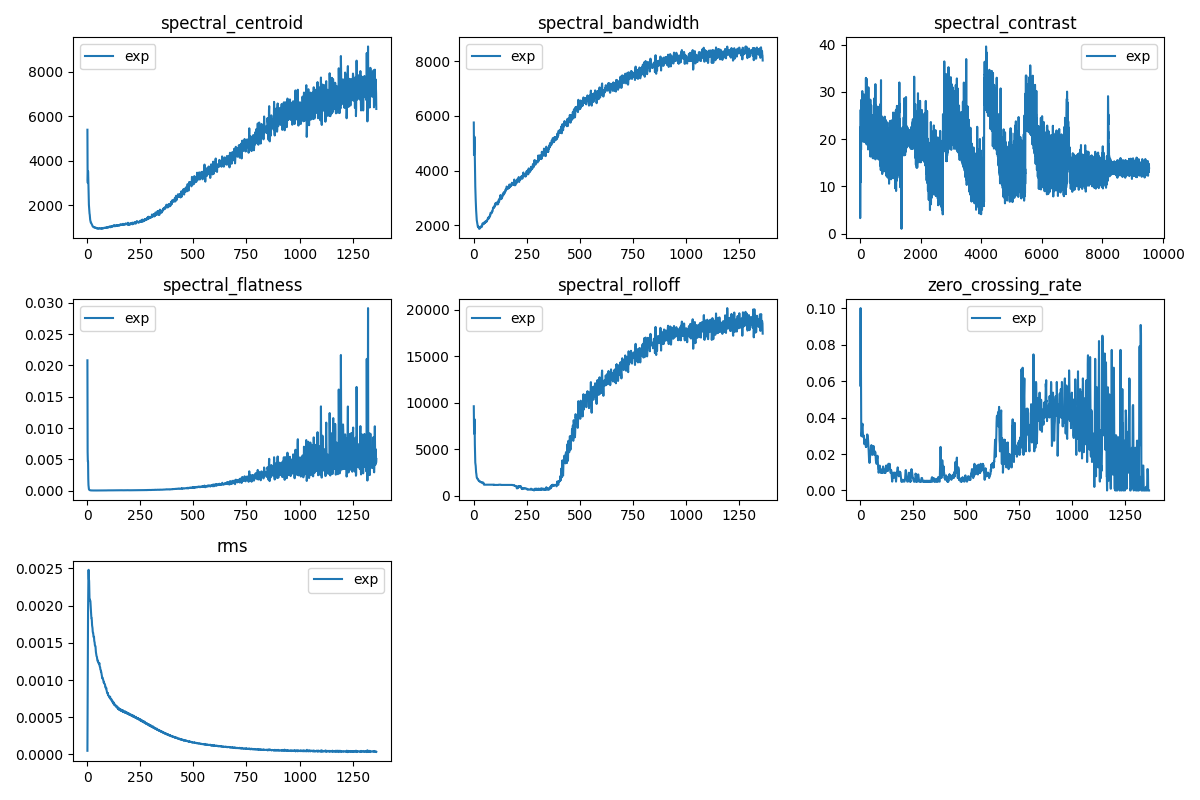

In [10]:
guit_exp_pos1_features = compute_features(guit_exp_pos1["acc_t"], fs)
print(guit_exp_pos1_features.keys())

fig = plt.figure(figsize=(12, 8))
for i, key in enumerate(guit_exp_pos1_features) :
    plt.subplot(3, 3, i + 1)
    plt.plot(guit_exp_pos1_features[key].reshape(-1), label="exp")
    plt.title(key)
    # plt.xlim(-3,3)
    # plt.yticks([])
    plt.legend()

fig.tight_layout()
plt.show()

# Expérience sur table d'harmonie uniquement

In [11]:
for i, file in enumerate(os.listdir(path_to_folder)) :
    filename, file_extension = os.path.splitext(file)
    if file_extension == ".mat" :
        print(file)

Guitare_Da_Prova_Pos_1.mat
Guitare_Da_Prova_Pos_2.mat
Guitare_Da_Prova_Decouple_Pos_1.mat
Guitare_Da_Prova_Pos_1_Doigt.mat
Guitare_Da_Prova_Decouple_Pos_2.mat


In [12]:
table_exp_pos1 = {
    "x_acc" : 13e-2, #position selon x de l'accéléromètre (m)
    "y_acc" : 8e-2, #position selon y de l'accéléromètre (m)
}

table_exp_pos2 = {
    "x_acc" : 19e-2, #position selon x de l'accéléromètre (m)
    "y_acc" : 11e-2, #position selon y de l'accéléromètre (m)
}

table_exp = {
    "table_config" : table_composite,
    "fs" : 0, #fréquence d'échantillonnage (Hz)
    "Pos 1" : table_exp_pos1,
    "Pos 2" : table_exp_pos2,
    "sensi_accel" : 5.39*9.81, #mV/(m/s2) : sensibilité de l'accéléromètre utilisé
    "sensi_marteau" : 19.23, #
}

In [13]:
mat = loadmat(path_to_folder+"Guitare_Da_Prova_Decouple_Pos_1.mat")
print(mat.keys())

fs = mat["fs"].reshape(-1)
table_exp["fs"] = fs

table_exp_pos1["acc_t"] = mat["acc_t"].reshape(-1)
table_exp_pos1["time"], table_exp_pos1["acc_t"] = mm.remove_init_noise(table_exp_pos1["acc_t"], fs)

table_exp_pos1["mar_t"] = mat["mar_t"].reshape(-1)
table_exp_pos1["time_mar"], table_exp_pos1["mar_t"] = mm.remove_init_noise(table_exp_pos1["mar_t"], fs)

from scipy.signal import oaconvolve
table_exp_pos1["RI"] = oaconvolve(table_exp_pos1["mar_t"],table_exp_pos1["acc_t"])

# table_exp_pos1["time"] = mat["time"].reshape(-1)
table_exp_pos1["frf"] = mat["FRF"].reshape(-1)
table_exp_pos1["freq"] = mat["freq"].reshape(-1)

mat = loadmat(path_to_folder+"Guitare_Da_Prova_Decouple_Pos_2.mat")
table_exp_pos2["acc_t"] = mat["acc_t"].reshape(-1)
table_exp_pos2["time"], table_exp_pos2["acc_t"] = mm.remove_init_noise(table_exp_pos2["acc_t"], fs)

table_exp_pos2["mar_t"] = mat["mar_t"].reshape(-1)
table_exp_pos2["time_mar"], table_exp_pos2["mar_t"] = mm.remove_init_noise(table_exp_pos2["mar_t"], fs)

from scipy.signal import oaconvolve
table_exp_pos2["RI"] = oaconvolve(table_exp_pos2["mar_t"],table_exp_pos2["acc_t"])

table_exp_pos2["frf"] = mat["FRF"].reshape(-1)
table_exp_pos2["freq"] = mat["freq"].reshape(-1)

dict_keys(['__header__', '__version__', '__globals__', 'FRF', 'acc_t', 'fen_acc', 'fen_mar', 'freq', 'fs', 'mar_t', 'signal_accelero_fen', 'signal_marteau_fen', 'time'])


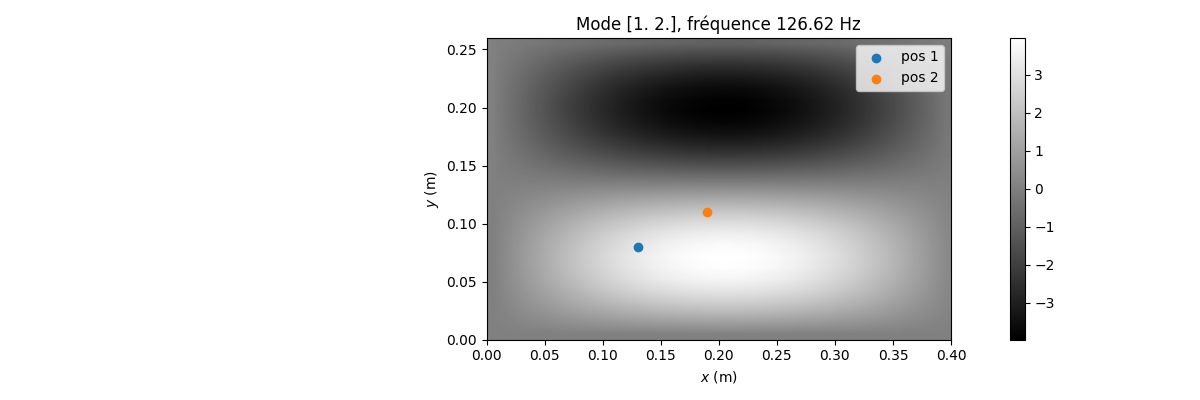

In [14]:
choose_mode = 2

fig = plt.figure()
ax1 = fig.add_subplot(111)

img = ax1.imshow(phiB_NxNy_NmB[:,choose_mode].reshape((Ny,Nx)),
    extent=[x[0], x[-1] , y[0], y[-1]] ,
    cmap="gray" ,
    interpolation = "bilinear",
    # aspect="auto" ,
    origin="lower")

ax1.scatter(table_exp_pos1["x_acc"],table_exp_pos1["y_acc"], label="pos 1", color="tab:blue")
ax1.scatter(table_exp_pos2["x_acc"],table_exp_pos2["y_acc"], label="pos 2", color="tab:orange")

ax1.legend()
fig.colorbar(img,ax=ax1)
ax1.set_xlabel("$x$ (m)")
ax1.set_ylabel(r"$y$ (m)")
ax1.set_title(fr"Mode {NmB_idx[:,choose_mode]}, fréquence {fnB[choose_mode]:.2f} Hz")

fig.tight_layout()

plt.show()

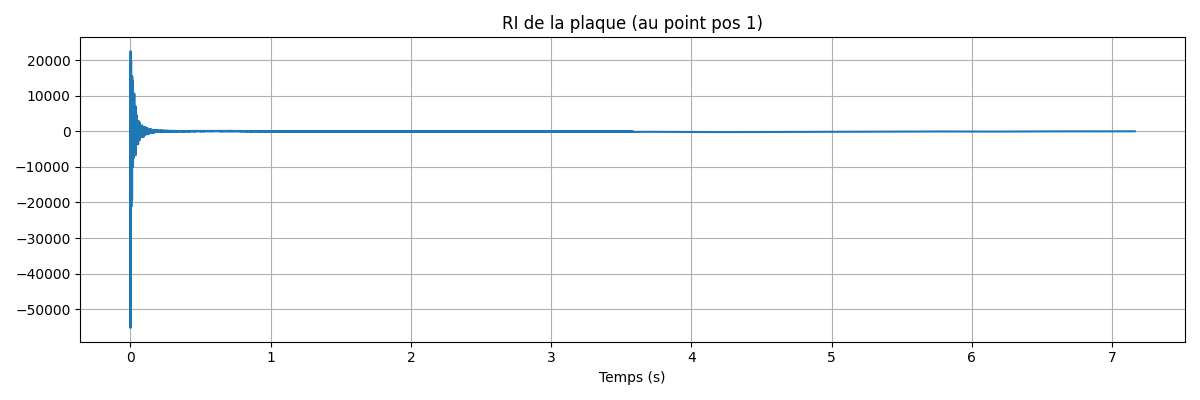

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(np.arange(len(table_exp_pos1["RI"]))/fs,table_exp_pos1["RI"],label="pos 1")
# ax1.plot(table_exp_pos2["RI"],label="pos 2")
ax1.grid()
#ax1.legend()
ax1.set_xlabel("Temps (s)")
ax1.set_ylabel("")
ax1.set_title(r"RI de la plaque (au point pos 1)")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()

In [16]:
sys.path.append("../../")
from HN_decomposition.Subspace.ESPRIT_numpy import *
from HN_decomposition.Subspace.preprocessing_numpy import *

target_sr = 11025

RI_resample = librosa.resample(table_exp_pos1["RI"], orig_sr=int(fs), target_sr=target_sr)

x_whiten, x_chopped, AR = whiten_signal(RI_resample[100:int(0.1*fs)], window_length=1024, hop_length=512//4, rankFilter_bins=41, rankFilter_rank=0.3, ARFilter_length=12)

poles, _, lambdas = ESPRIT(x_whiten[0], 50)

f_esp = np.angle(poles)/2/np.pi * 11025
delta_esp = np.log(np.abs(poles))

In [17]:
fk, deltak = mm.ESPRIT(RI_resample[100:3000],len(RI_resample[100:3000])//2, 30)

# fk*fs/75.5

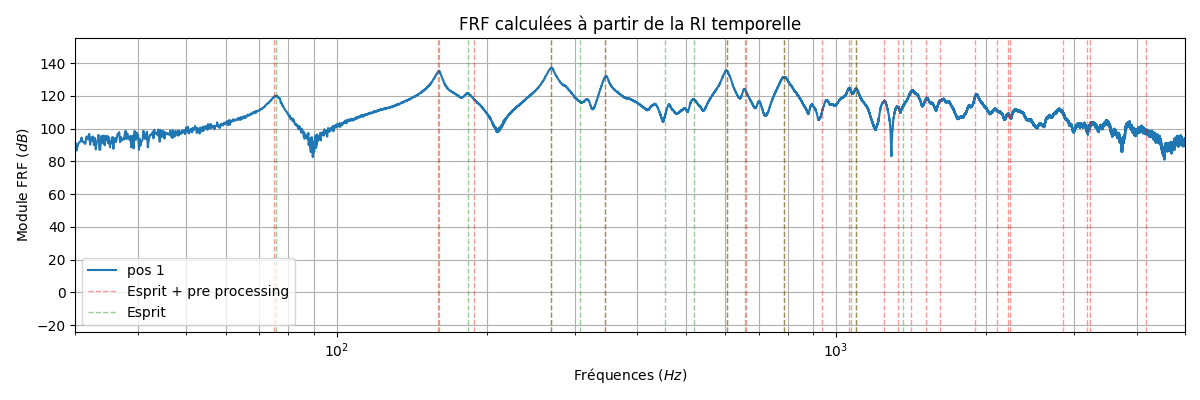

In [18]:
Y = np.fft.rfft(table_exp_pos1["RI"])
fy = np.fft.rfftfreq(len(table_exp_pos1["RI"]),1/fs)

Y2 = np.fft.rfft(table_exp_pos2["RI"])
fy2 = np.fft.rfftfreq(len(table_exp_pos2["RI"]),1/fs)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.semilogx(fy,20*np.log10(np.abs(Y)),label="pos 1")
# ax1.semilogx(fy2,20*np.log10(np.abs(Y2)),label="pos 2")
ax1.grid(which="both")
ax1.set_xlabel("Fréquences $(Hz)$")
ax1.set_ylabel("Module FRF $(dB)$")
ax1.set_title(r"FRF calculées à partir de la RI temporelle")
ax1.set_xlim(30,5000)
ylims = ax1.set_ylim()
# ax1.vlines(75.5*fnB[:10]/fnB[0],ylims[0],ylims[1], ls="--", lw=1, color="black", label="Rapport appuis simple", alpha=0.4)
ax1.vlines(f_esp,ylims[0],ylims[1], ls="--", lw=1, color="r", label="Esprit + pre processing", alpha=0.4)
ax1.vlines(fk*target_sr,ylims[0],ylims[1], ls="--", lw=1, color="g", label="Esprit", alpha=0.4)
ax1.legend()

fig.tight_layout()

plt.show()

In [19]:
deltak

array([ 6.17779962e-06, -2.94782834e-01, -1.06374066e-03, -1.40394488e-03,
       -4.14375991e-03, -2.58878191e-03, -1.83385232e-03, -2.48889030e-03,
       -2.81848209e-03, -6.22120206e-03, -5.10142703e-03, -4.30305685e-03,
       -9.97489969e-03, -9.23668864e-03, -1.39614843e-02, -3.09735729e-02])

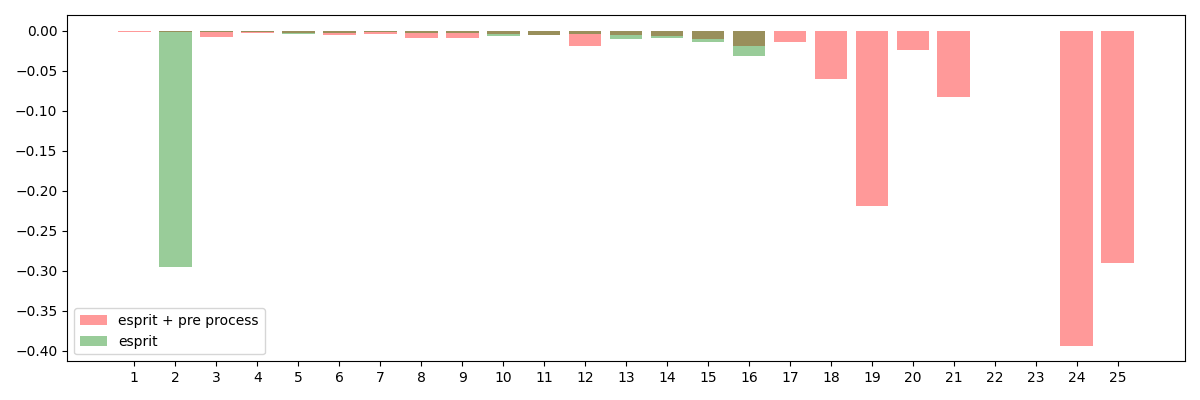

In [20]:
p = np.argsort(f_esp)
f_esp = f_esp[p]
delta_esp = delta_esp[p]

delta_esp = delta_esp[f_esp>0]
f_esp = f_esp[f_esp>0]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.bar(np.arange(1,len(delta_esp)+1),delta_esp,label="esprit + pre process", color="r", alpha=0.4)
ax1.bar(np.arange(1,len(deltak)+1),deltak,label="esprit", color="g", alpha=0.4)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim()
ax1.set_ylim()
ax1.set_xticks(np.arange(1,len(delta_esp)+1))
# ax1.grid()
ax1.legend()

fig.tight_layout()

plt.show()

In [21]:
delta_esp[:16]

array([-0.0013885 , -0.00140763, -0.00784205, -0.00268754, -0.00230457,
       -0.00546443, -0.00451449, -0.00932988, -0.00918879, -0.00426891,
       -0.00486482, -0.01948179, -0.00494489, -0.00680774, -0.01069097,
       -0.01866193])

In [22]:
clamped_ratio = np.load("../vico_modphy/clamped_ratio.npy")

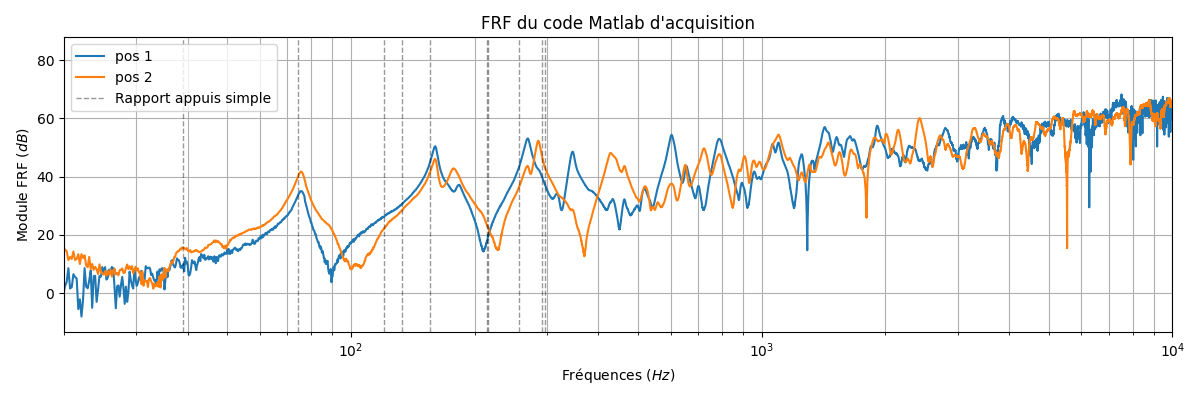

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

f11 = 39

vit_pos1 = table_exp_pos1["frf"][100:]/1j/2/np.pi/(table_exp_pos1["freq"][100:]+1e-9)
vit_pos2 = table_exp_pos2["frf"][100:]/1j/2/np.pi/(table_exp_pos2["freq"][100:]+1e-9)

# ax1.semilogx(table_exp_pos1["freq"][100:],20*np.log10(np.abs(vit_pos1)/np.max(np.abs(vit_pos1))),label="pos 1", color="tab:blue")
# ax1.semilogx(table_exp_pos2["freq"][100:],20*np.log10(np.abs(vit_pos2)/np.max(np.abs(vit_pos2))),label="pos 2", color="tab=orange")

ax1.semilogx(table_exp_pos1["freq"], 20*np.log10(np.abs(table_exp_pos1["frf"])), label="pos 1")
ax1.semilogx(table_exp_pos2["freq"], 20*np.log10(np.abs(table_exp_pos2["frf"])), label="pos 2")

ax1.grid(which="both")
ax1.set_title(r"FRF du code Matlab d'acquisition")
ax1.set_ylabel("Module FRF $(dB)$")
ax1.set_xlabel("Fréquences $(Hz)$")
ax1.set_xlim(20,10000)
ylims = ax1.set_ylim()
ax1.vlines(f11*fnB[:10]/fnB[0],ylims[0],ylims[1], ls="--", lw=1, color="black", label="Rapport appuis simple", alpha=0.4)
# ax1.vlines(f11*clamped_ratio,ylims[0],ylims[1], ls="--", lw=1, color="green", label="Rapport encastré", alpha=0.4)
ax1.legend()
# ax1.vlines(f11*fk*fs/75.5,ylims[0],ylims[1], ls="--", lw=1, color="green", label="Rapport appuis simple")

fig.tight_layout()

plt.show()

In [27]:
f21f11 = 3/(1+(Lx/Ly)**2) + 1
f12f11 = 3/((Ly/Lx)**2 + 1) + 1
print(f"En appuis simple : f21/f11 = {f21f11:.3f}, f12/f11 = {f12f11:.3f}")
f11 = 75.5
print(f"Soit f21 = {f21f11*f11:.3f} Hz, f12 = {f12f11*f11:.3f} Hz")

En appuis simple : f21/f11 = 1.886, f12/f11 = 3.114
Soit f21 = 142.409 Hz, f12 = 235.091 Hz
